# Welcome to the Student Grading Project!

### Our Aim:
To visualize and find out the variables that are influencing the Grades. Build a Linear Regression model to find the grades obtained by the student. This study will help institutions to focus on the parameters which may help in increasing their institution's performance.

In [722]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [723]:
df_maths = pd.read_csv('student-mat.csv',encoding = 'utf-8',sep=';')
df_portugese = pd.read_csv('student-por.csv',encoding = 'utf-8',sep=';')

In [724]:
# Let's looks ta the head of the data frames!

df_maths.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [725]:
df_portugese.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [726]:
print('Maths DF shape: ' , df_maths.shape)
print('Portugal Language DF shape: ' , df_portugese.shape)

Maths DF shape:  (395, 33)
Portugal Language DF shape:  (649, 33)


In [727]:
# So if forward going, we try to megre these data frames, wee need to bring the shape to be equal.
df_maths.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [728]:
df_portugese.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [729]:
print(df_maths.info())
print(df_portugese.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [730]:
# We see that the columns are same for both the dataframes, but the row count is different
df_concatenated=df_maths.append(df_portugese,ignore_index=True)
df_concatenated.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [731]:
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-nul

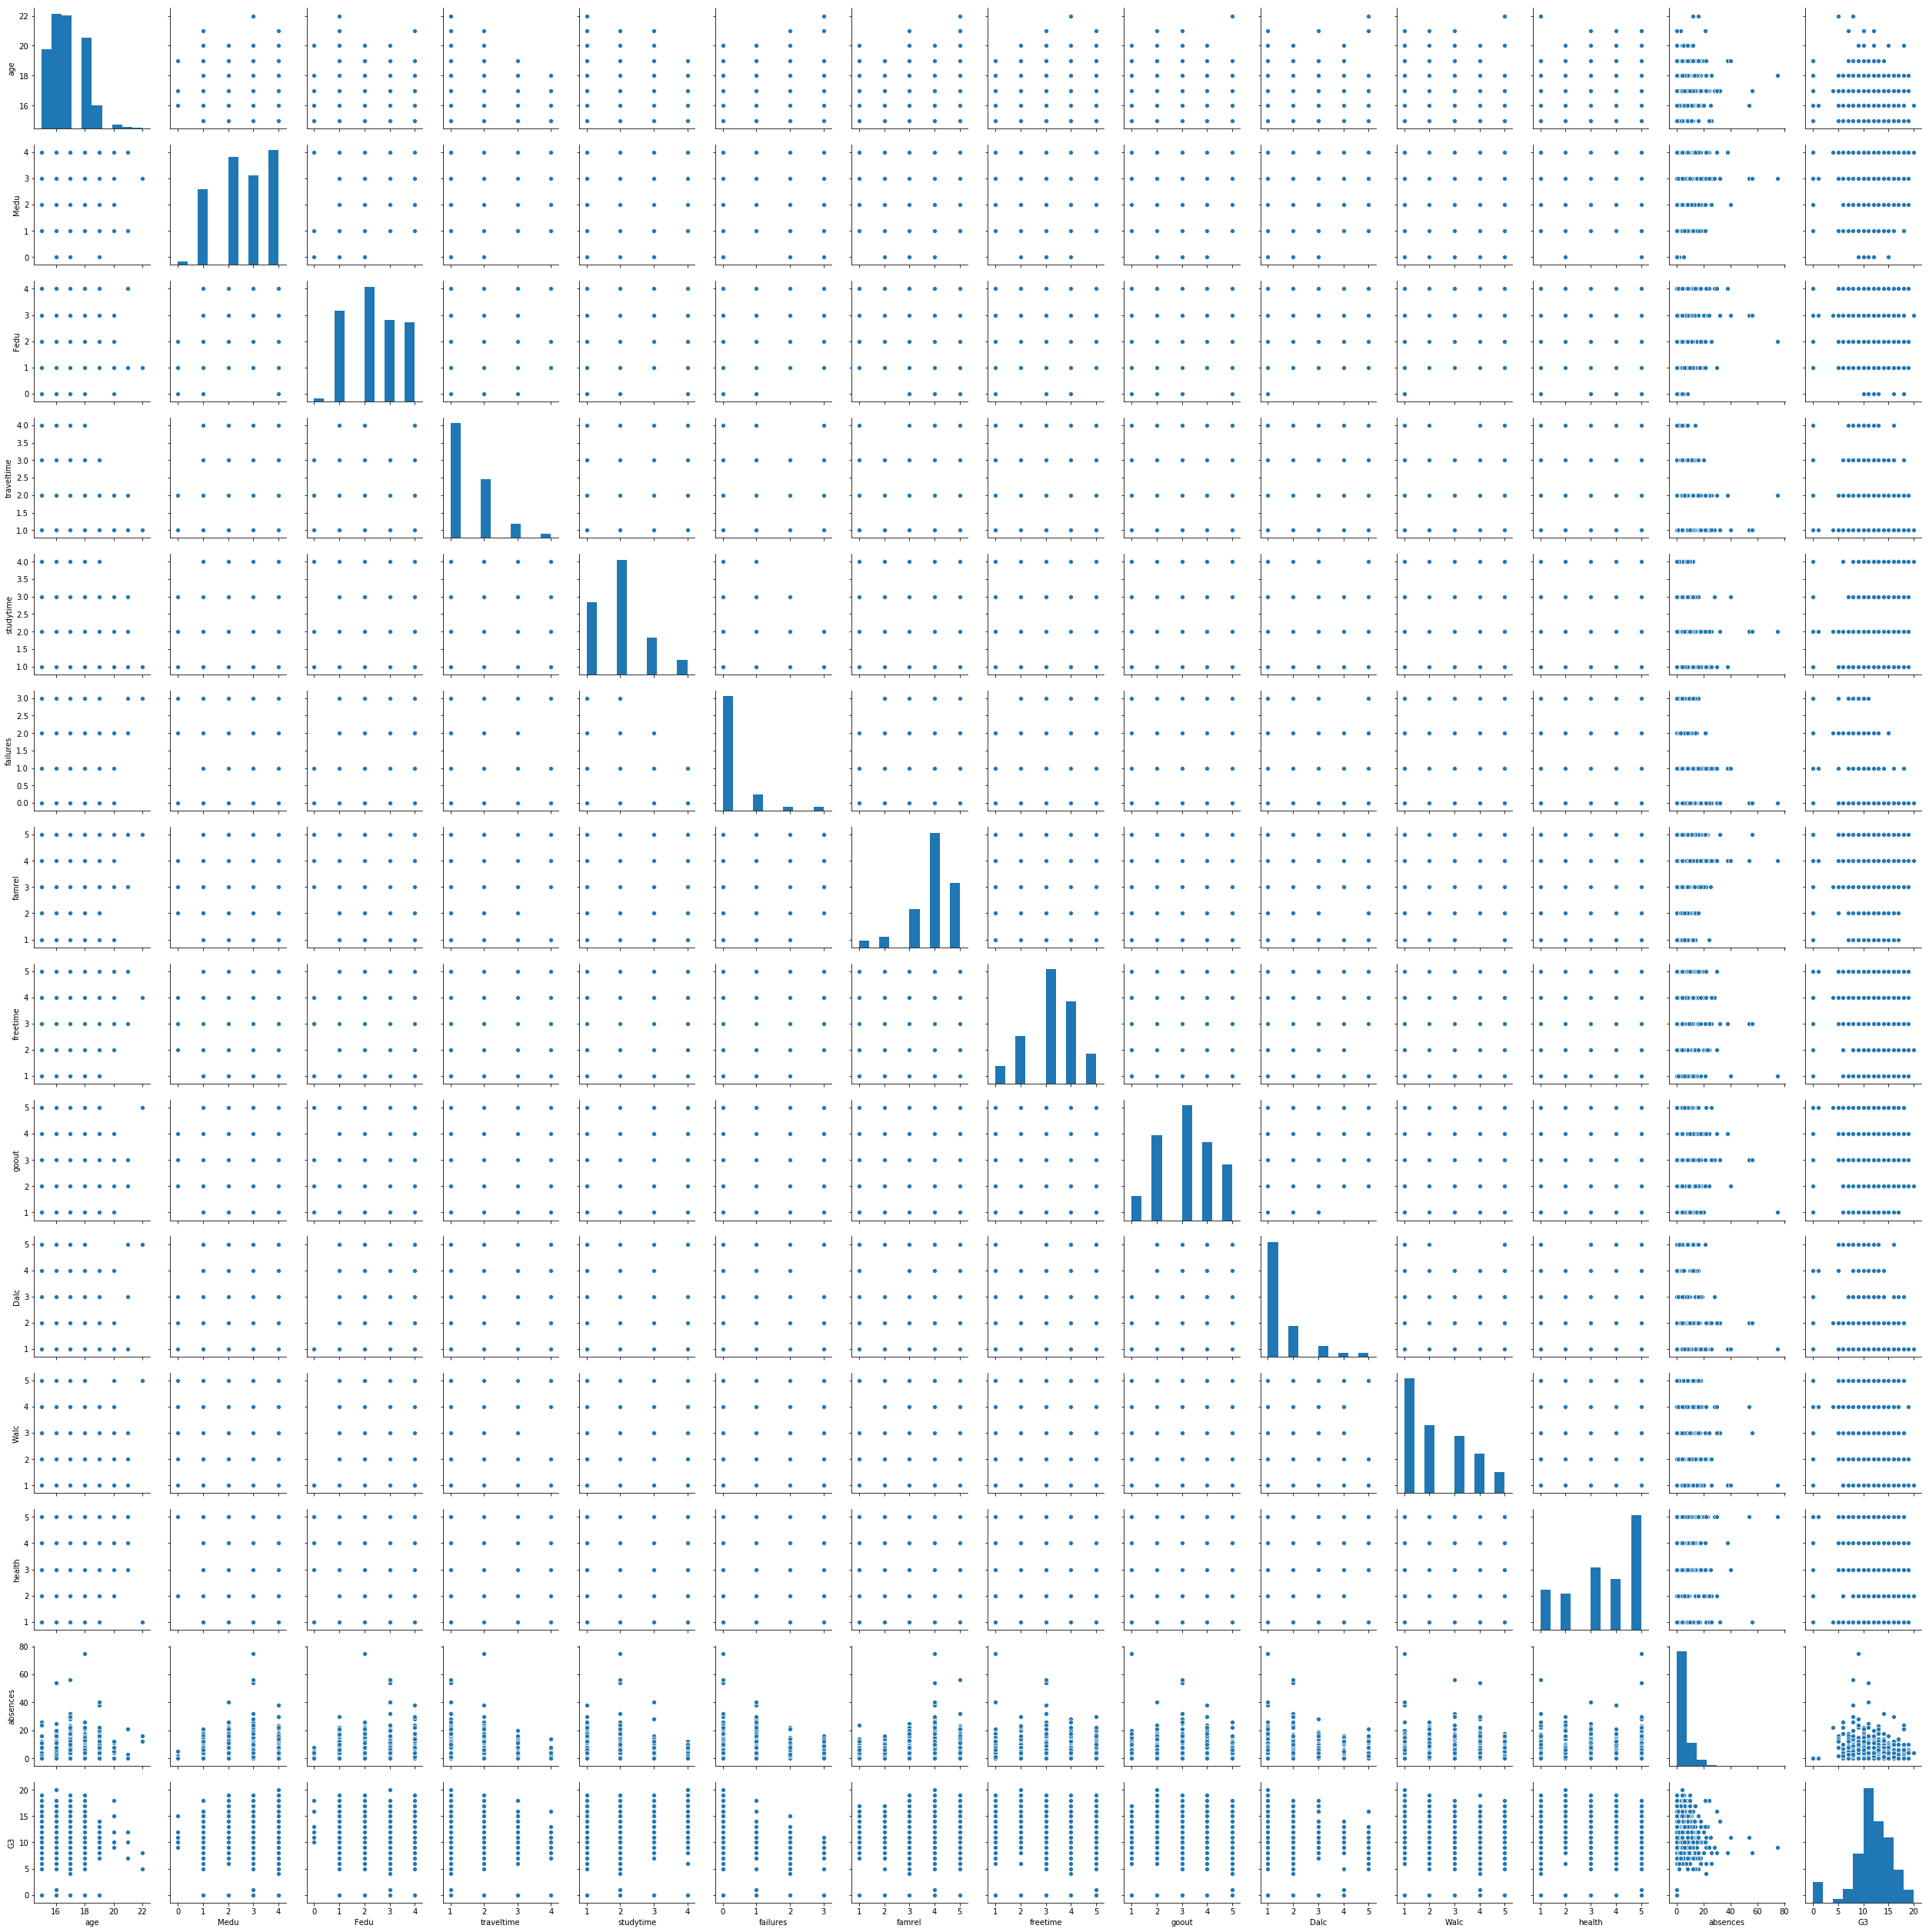

In [798]:
sns.pairplot(df_concatenated)

In [732]:
print('Shape of the Concatenated DF: ',df_concatenated.shape)
print(df_concatenated.isnull().sum())

Shape of the Concatenated DF:  (1044, 33)
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


df_concatenated = df_concatenated[~df_concatenated.index.duplicated()] 

In [733]:
df_concatenated = df_concatenated.drop_duplicates(keep=False)

In [734]:
df_concatenated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 33 columns):
school        1044 non-null object
sex           1044 non-null object
age           1044 non-null int64
address       1044 non-null object
famsize       1044 non-null object
Pstatus       1044 non-null object
Medu          1044 non-null int64
Fedu          1044 non-null int64
Mjob          1044 non-null object
Fjob          1044 non-null object
reason        1044 non-null object
guardian      1044 non-null object
traveltime    1044 non-null int64
studytime     1044 non-null int64
failures      1044 non-null int64
schoolsup     1044 non-null object
famsup        1044 non-null object
paid          1044 non-null object
activities    1044 non-null object
nursery       1044 non-null object
higher        1044 non-null object
internet      1044 non-null object
romantic      1044 non-null object
famrel        1044 non-null int64
freetime      1044 non-null int64
goout         1044 non-nul

In [735]:
df_concatenated[df_concatenated.duplicated(keep=False)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [736]:
# Now we will look at the Levels/Unique values of all the Categorical Features.
cols = df_concatenated.select_dtypes(include=[object])
for i in cols:
    print('---------------')
    print(df_concatenated[i].value_counts())

---------------
GP    772
MS    272
Name: school, dtype: int64
---------------
F    591
M    453
Name: sex, dtype: int64
---------------
U    759
R    285
Name: address, dtype: int64
---------------
GT3    738
LE3    306
Name: famsize, dtype: int64
---------------
T    923
A    121
Name: Pstatus, dtype: int64
---------------
other       399
services    239
at_home     194
teacher     130
health       82
Name: Mjob, dtype: int64
---------------
other       584
services    292
teacher      65
at_home      62
health       41
Name: Fjob, dtype: int64
---------------
course        430
home          258
reputation    248
other         108
Name: reason, dtype: int64
---------------
mother    728
father    243
other      73
Name: guardian, dtype: int64
---------------
no     925
yes    119
Name: schoolsup, dtype: int64
---------------
yes    640
no     404
Name: famsup, dtype: int64
---------------
no     824
yes    220
Name: paid, dtype: int64
---------------
no     528
yes    516
Name: activ

### Now first the RoadMap we will follow:

1. Visualize, perform Univariate/Bivariate Analysis
2. Find Outliers if any and treat them if required.
3. The we will go for Modelling (**Linear Regression**) as our aim is to assign **GRADE** to the student based on their marks.
4. Label Encode/Hot Encode/Dummy the Categorical Variables
5. Perform Scaling once the dataframe is totally **Numerical**.
6. Perform the OLS (**Ordinary Least Squares**) Regression using Statsmodel, and build a clean model with **P-values and VIF** values in control.
7. Check the accuracy and Make predictions on the test set.
8. Assign the Grades to the Train Set and Test set respectively.
9. Suuport our model with the proper Evaluation metrics.
10. State the conclusion for the project.

In [737]:
cols.shape

(1044, 17)

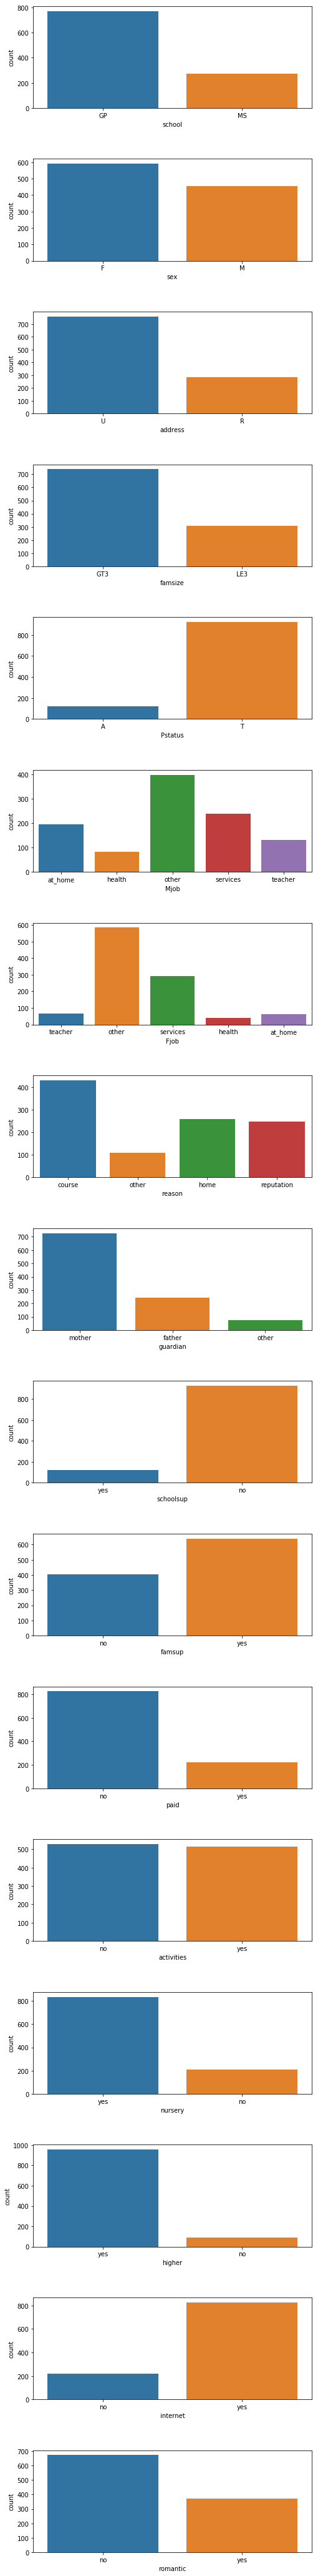

In [738]:
x=1
plt.figure(figsize=(8,75))
plt.subplots_adjust(hspace=0.5)
for i in cols:
    plt.subplot(17,1,x)
    sns.countplot(df_concatenated[i]);
    x=x+1

## Inferences:

1. We have a lot of Students from School **Gabriel Periera**.
2. Schools have a lot of **Female** students that too from **Urban** areas which depicts that the students are above the **Lower Class People**.
3. Mostly students have cousins/family of more than 3 members.
4. Most of the students are living together with their family, that means they are either into other part of the location or admissioned into a boarding school.
5. Mostly **Mother's** are guardin of the students, why not, *I would like to discuss few things from my mom, rather than my dad! lol, he'll kill me !*

### Now let's see the variables which are getting affected due to schools, like Reason for joining the school,father's Job/Mother's Job!

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


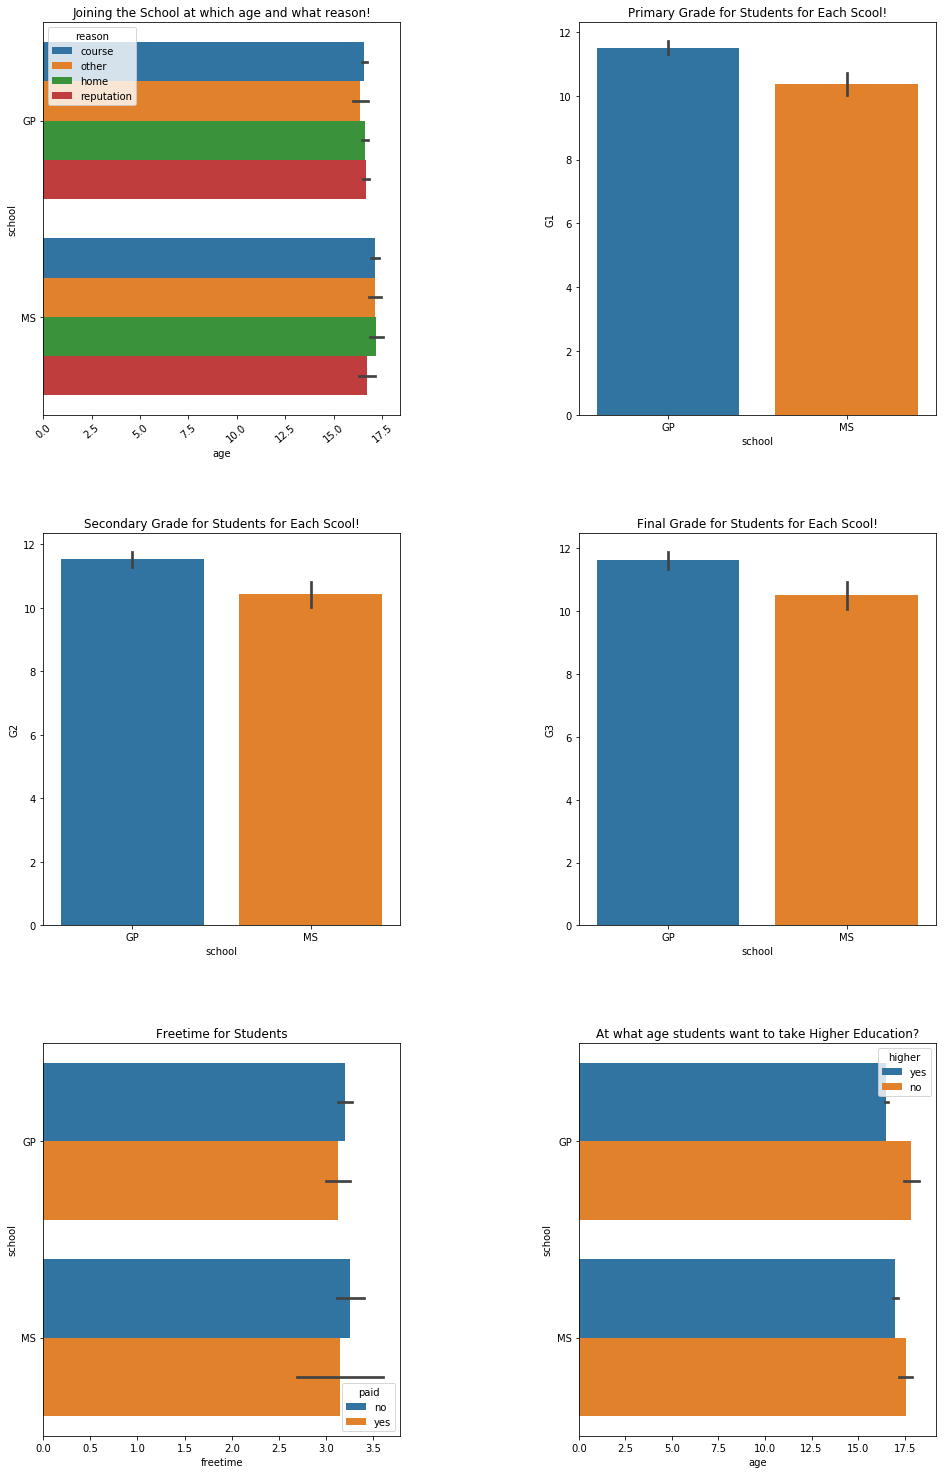

In [739]:
plt.figure(figsize=(16,26))
plt.subplot(3,2,1)
plt.subplots_adjust(hspace=0.3,wspace=0.5)
plt.xticks(rotation=40)
plt.title('Joining the School at which age and what reason!');
sns.barplot(x = 'age' , y = 'school',hue = 'reason',data = df_concatenated);
plt.subplot(3,2,2)
plt.title('Primary Grade for Students for Each Scool!');
sns.barplot(x = 'school',y = 'G1',data = df_concatenated);
plt.subplot(3,2,3)
plt.title('Secondary Grade for Students for Each Scool!');
sns.barplot(x = 'school',y = 'G2',data = df_concatenated);
plt.subplot(3,2,4)
plt.title('Final Grade for Students for Each Scool!');
sns.barplot(x = 'school',y = 'G3',data = df_concatenated);
plt.subplot(3,2,5)
plt.title('Freetime for Students');
sns.barplot(x = 'freetime' , y = 'school',hue = 'paid',data = df_concatenated);
plt.subplot(3,2,6)
plt.title('At what age students want to take Higher Education?');
sns.barplot(x = 'age' , y = 'school',hue = 'higher',data = df_concatenated);

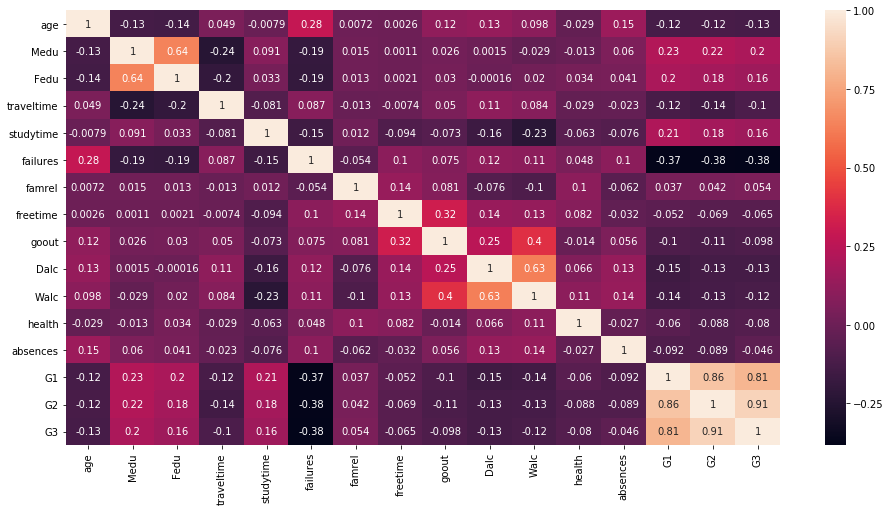

In [740]:
plt.figure(figsize=(16,8))
sns.heatmap(df_concatenated.corr(),annot=True);

In [741]:
df_concatenated.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [742]:
# We will drop the G1,G2 columns and will consider the final GRADE G3
df_concatenated.drop(['G1','G2'],axis=1,inplace=True)
df_concatenated.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,10


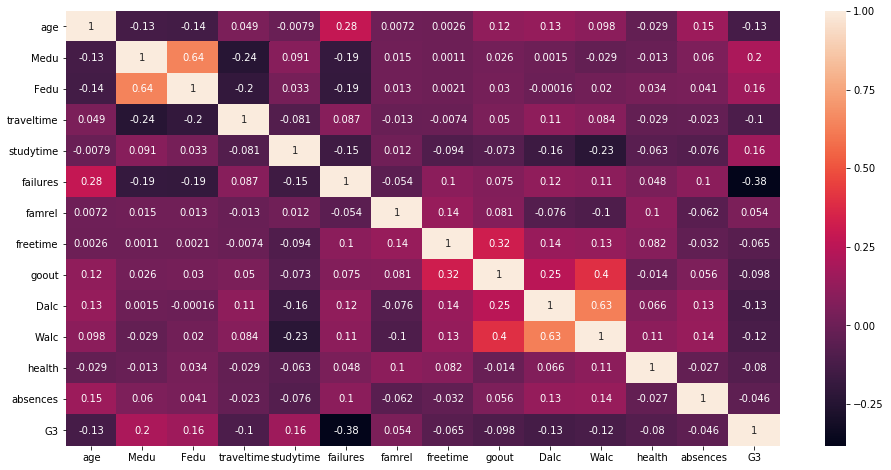

In [743]:
plt.figure(figsize=(16,8))
sns.heatmap(df_concatenated.corr(),annot=True);

We'll dummy out the **Categorical Values** with more than 2 levels:

In [744]:
df_dummy_reason = pd.get_dummies(df_concatenated.reason,prefix='reason_is')
df_concatenated_final = pd.concat([df_concatenated,df_dummy_reason],axis=1)
df_concatenated_final.info()
# We will drop reason variable

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 35 columns):
school                  1044 non-null object
sex                     1044 non-null object
age                     1044 non-null int64
address                 1044 non-null object
famsize                 1044 non-null object
Pstatus                 1044 non-null object
Medu                    1044 non-null int64
Fedu                    1044 non-null int64
Mjob                    1044 non-null object
Fjob                    1044 non-null object
reason                  1044 non-null object
guardian                1044 non-null object
traveltime              1044 non-null int64
studytime               1044 non-null int64
failures                1044 non-null int64
schoolsup               1044 non-null object
famsup                  1044 non-null object
paid                    1044 non-null object
activities              1044 non-null object
nursery                 1044 non-null object

In [745]:
df_dummy_Fjob = pd.get_dummies(df_concatenated_final.Fjob,prefix = 'Fjob_is')
df_concatenated_final_2 = pd.concat([df_dummy_Fjob,df_concatenated_final],axis=1)
df_concatenated_final_2.info()
# We have to drop Fjob

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 40 columns):
Fjob_is_at_home         1044 non-null uint8
Fjob_is_health          1044 non-null uint8
Fjob_is_other           1044 non-null uint8
Fjob_is_services        1044 non-null uint8
Fjob_is_teacher         1044 non-null uint8
school                  1044 non-null object
sex                     1044 non-null object
age                     1044 non-null int64
address                 1044 non-null object
famsize                 1044 non-null object
Pstatus                 1044 non-null object
Medu                    1044 non-null int64
Fedu                    1044 non-null int64
Mjob                    1044 non-null object
Fjob                    1044 non-null object
reason                  1044 non-null object
guardian                1044 non-null object
traveltime              1044 non-null int64
studytime               1044 non-null int64
failures                1044 non-null int64
scho

In [746]:
df_dummy_Mjob = pd.get_dummies(df_concatenated_final.Mjob,prefix = 'Mjob_is')
df_concatenated_final_3 = pd.concat([df_dummy_Mjob,df_concatenated_final_2],axis=1)
df_concatenated_final_3.info()
# We have to drop Mjob variable!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 45 columns):
Mjob_is_at_home         1044 non-null uint8
Mjob_is_health          1044 non-null uint8
Mjob_is_other           1044 non-null uint8
Mjob_is_services        1044 non-null uint8
Mjob_is_teacher         1044 non-null uint8
Fjob_is_at_home         1044 non-null uint8
Fjob_is_health          1044 non-null uint8
Fjob_is_other           1044 non-null uint8
Fjob_is_services        1044 non-null uint8
Fjob_is_teacher         1044 non-null uint8
school                  1044 non-null object
sex                     1044 non-null object
age                     1044 non-null int64
address                 1044 non-null object
famsize                 1044 non-null object
Pstatus                 1044 non-null object
Medu                    1044 non-null int64
Fedu                    1044 non-null int64
Mjob                    1044 non-null object
Fjob                    1044 non-null object
reason

In [747]:
df_concatenated_final_3.head()

,Mjob_is_at_home,Mjob_is_health,Mjob_is_other,Mjob_is_services,Mjob_is_teacher,Fjob_is_at_home,Fjob_is_health,Fjob_is_other,Fjob_is_services,Fjob_is_teacher,...,goout,Dalc,Walc,health,absences,G3,reason_is_course,reason_is_home,reason_is_other,reason_is_reputation
0,1,0,0,0,0,0,0,0,0,1,...,4,1,1,3,6,6,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,3,1,1,3,4,6,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,2,2,3,3,10,10,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,2,1,1,5,2,15,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,2,1,2,5,4,10,0,1,0,0


In [748]:
df_concatenated_final_3.drop(['Mjob','Fjob','reason'],axis=1,inplace=True)
df_concatenated_final_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 42 columns):
Mjob_is_at_home         1044 non-null uint8
Mjob_is_health          1044 non-null uint8
Mjob_is_other           1044 non-null uint8
Mjob_is_services        1044 non-null uint8
Mjob_is_teacher         1044 non-null uint8
Fjob_is_at_home         1044 non-null uint8
Fjob_is_health          1044 non-null uint8
Fjob_is_other           1044 non-null uint8
Fjob_is_services        1044 non-null uint8
Fjob_is_teacher         1044 non-null uint8
school                  1044 non-null object
sex                     1044 non-null object
age                     1044 non-null int64
address                 1044 non-null object
famsize                 1044 non-null object
Pstatus                 1044 non-null object
Medu                    1044 non-null int64
Fedu                    1044 non-null int64
guardian                1044 non-null object
traveltime              1044 non-null int64
studyti

In [749]:
# Now we will hot encode the 2 level variables so that we don't get a lot of variables to deal on later.
cols = df_concatenated_final_3.select_dtypes(include = ['object'])
for i in cols:
    df_concatenated_final_3[i] = df_concatenated_final_3[i].astype('category')
    df_concatenated_final_3[i] = df_concatenated_final_3[i].cat.codes

In [750]:
df_concatenated_final_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 1043
Data columns (total 42 columns):
Mjob_is_at_home         1044 non-null uint8
Mjob_is_health          1044 non-null uint8
Mjob_is_other           1044 non-null uint8
Mjob_is_services        1044 non-null uint8
Mjob_is_teacher         1044 non-null uint8
Fjob_is_at_home         1044 non-null uint8
Fjob_is_health          1044 non-null uint8
Fjob_is_other           1044 non-null uint8
Fjob_is_services        1044 non-null uint8
Fjob_is_teacher         1044 non-null uint8
school                  1044 non-null int8
sex                     1044 non-null int8
age                     1044 non-null int64
address                 1044 non-null int8
famsize                 1044 non-null int8
Pstatus                 1044 non-null int8
Medu                    1044 non-null int64
Fedu                    1044 non-null int64
guardian                1044 non-null int8
traveltime              1044 non-null int64
studytime          

In [751]:
df_concatenated_final_3.head()

,Mjob_is_at_home,Mjob_is_health,Mjob_is_other,Mjob_is_services,Mjob_is_teacher,Fjob_is_at_home,Fjob_is_health,Fjob_is_other,Fjob_is_services,Fjob_is_teacher,...,goout,Dalc,Walc,health,absences,G3,reason_is_course,reason_is_home,reason_is_other,reason_is_reputation
0,1,0,0,0,0,0,0,0,0,1,...,4,1,1,3,6,6,1,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,3,1,1,3,4,6,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,2,2,3,3,10,10,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,2,1,1,5,2,15,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0,...,2,1,2,5,4,10,0,1,0,0


Now let's scale the untouched variables and slipt the dataset into **Train and Test** sets!

In [752]:
df_concatenated_final_3.columns

Index(['Mjob_is_at_home', 'Mjob_is_health', 'Mjob_is_other',
       'Mjob_is_services', 'Mjob_is_teacher', 'Fjob_is_at_home',
       'Fjob_is_health', 'Fjob_is_other', 'Fjob_is_services',
       'Fjob_is_teacher', 'school', 'sex', 'age', 'address', 'famsize',
       'Pstatus', 'Medu', 'Fedu', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G3', 'reason_is_course',
       'reason_is_home', 'reason_is_other', 'reason_is_reputation'],
      dtype='object')

In [753]:
num_vars_to_scale = ['age','Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health',
                    'absences','G3']
training_set,testing_set = train_test_split(df_concatenated_final_3,test_size=0.3,random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
training_set[num_vars_to_scale] = scaler.fit_transform(training_set[num_vars_to_scale])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


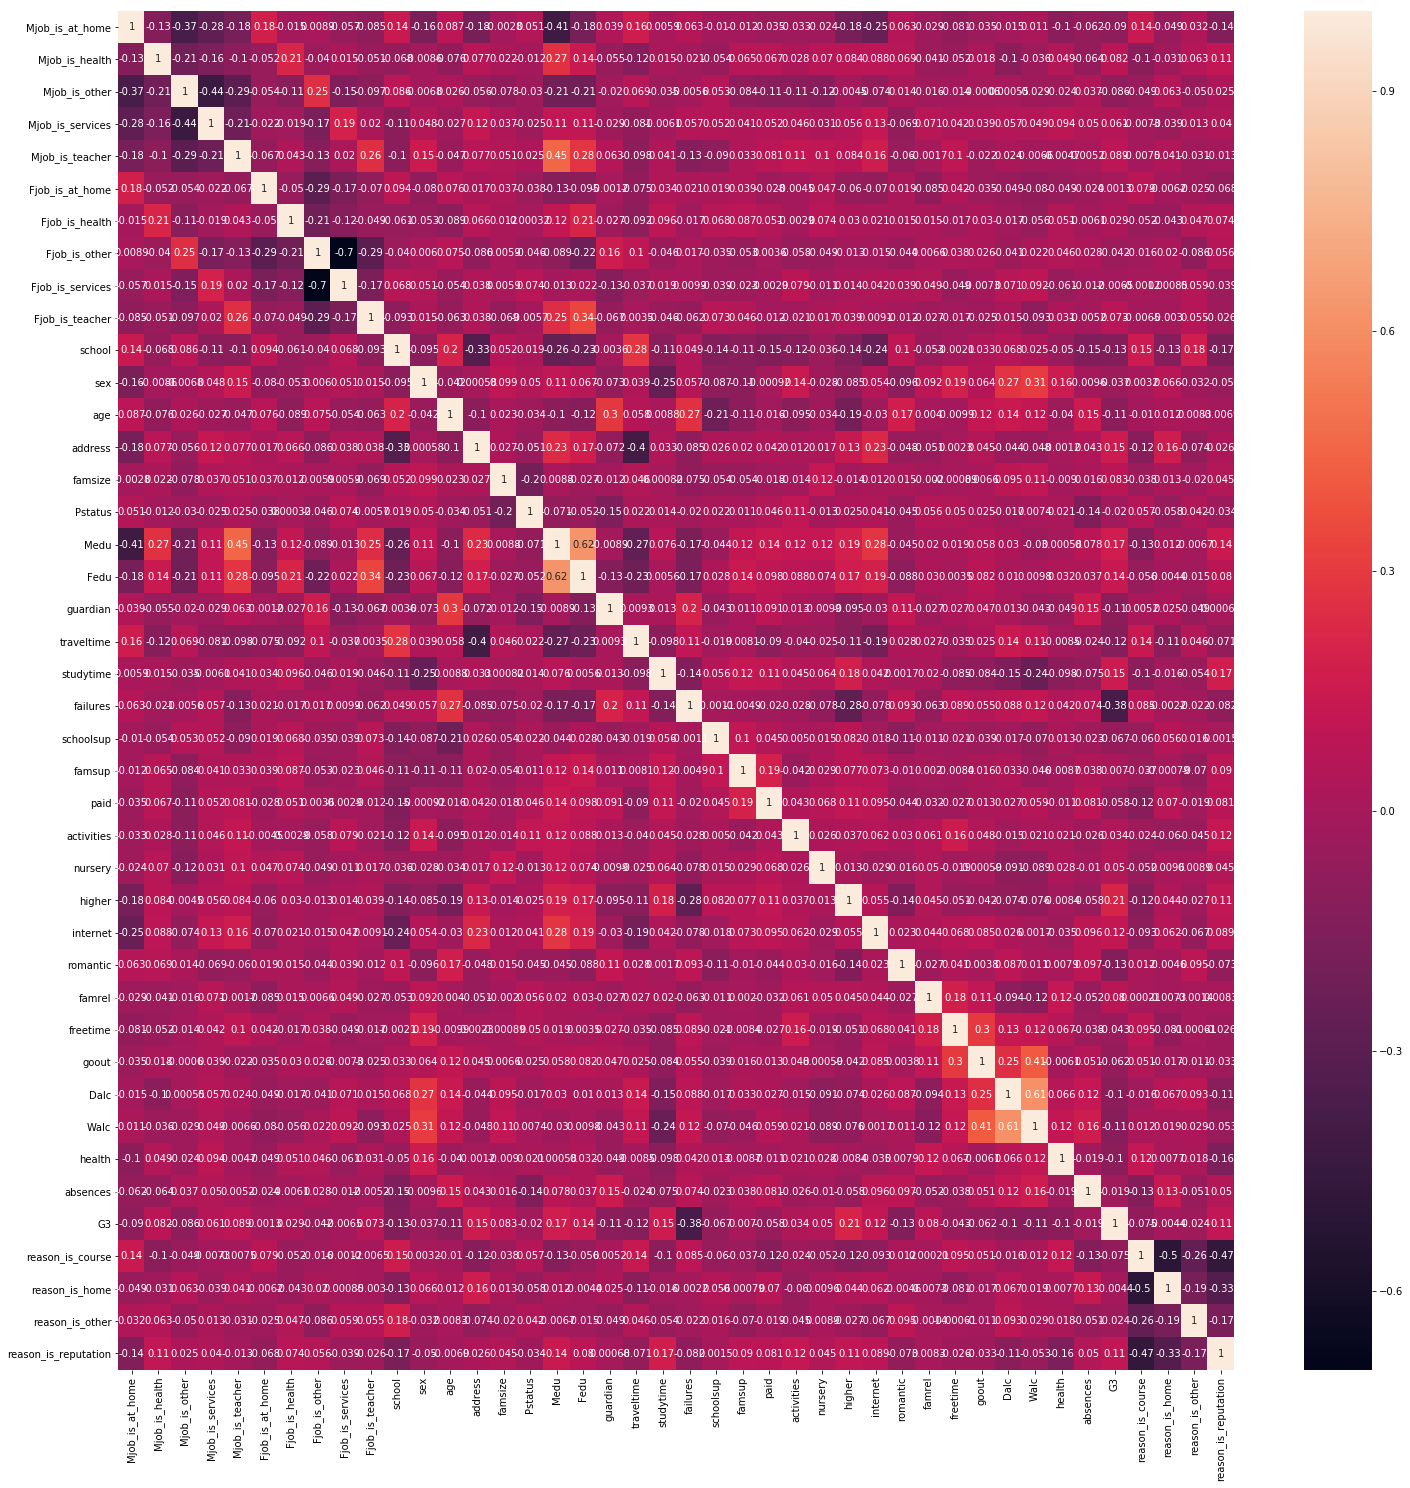

In [754]:
plt.figure(figsize=(25,25))
sns.heatmap(training_set.corr(),annot=True);

In [755]:
y_train = training_set.pop('G3')
X_train = training_set

In [756]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [757]:
col = X_train.columns[rfe.support_]
col

Index(['Mjob_is_health', 'Mjob_is_services', 'Fjob_is_teacher', 'school',
       'address', 'studytime', 'failures', 'schoolsup', 'paid', 'higher',
       'romantic', 'famrel', 'goout', 'health', 'absences'],
      dtype='object')

In [758]:
X_train_rfe = X_train[col]
X_train_lm = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_lm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     14.43
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           1.61e-32
Time:                        19:00:35   Log-Likelihood:                 225.87
No. Observations:                 730   AIC:                            -419.7
Df Residuals:                     714   BIC:                            -346.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5300      0.040  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Now we will drop the **High P-Valued** variables and then rebuild the model. This appriach is iterative until and unless all the **p-Values** are controlled.

In [759]:
X_train_new = X_train_lm.drop('absences',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     15.43
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           5.15e-33
Time:                        19:00:35   Log-Likelihood:                 225.59
No. Observations:                 730   AIC:                            -421.2
Df Residuals:                     715   BIC:                            -352.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5353      0.039  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [760]:
X_train_new = X_train_lm.drop('goout',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     16.43
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           3.46e-33
Time:                        19:00:35   Log-Likelihood:                 224.49
No. Observations:                 730   AIC:                            -421.0
Df Residuals:                     716   BIC:                            -356.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5205      0.038  

In [761]:
X_train_new = X_train_lm.drop('Fjob_is_teacher',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     17.49
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           3.34e-33
Time:                        19:00:35   Log-Likelihood:                 222.96
No. Observations:                 730   AIC:                            -419.9
Df Residuals:                     717   BIC:                            -360.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5251      0.038  

In [762]:
X_train_new = X_train_lm.drop('famrel',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     18.77
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           3.00e-33
Time:                        19:00:36   Log-Likelihood:                 221.47
No. Observations:                 730   AIC:                            -418.9
Df Residuals:                     718   BIC:                            -363.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5600      0.032  

In [763]:
X_train_new = X_train_lm.drop('address',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     20.17
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           4.21e-33
Time:                        19:00:36   Log-Likelihood:                 219.48
No. Observations:                 730   AIC:                            -417.0
Df Residuals:                     719   BIC:                            -366.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5828      0.030  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [764]:
X_train_new = X_train_lm.drop('studytime',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     21.49
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           2.21e-32
Time:                        19:00:36   Log-Likelihood:                 216.08
No. Observations:                 730   AIC:                            -412.2
Df Residuals:                     720   BIC:                            -366.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5986      0.030  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [765]:
X_train_new = X_train_lm.drop('Mjob_is_health',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     23.17
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           1.06e-31
Time:                        19:00:36   Log-Likelihood:                 212.73
No. Observations:                 730   AIC:                            -407.5
Df Residuals:                     721   BIC:                            -366.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5973      0.030  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [766]:
X_train_new = X_train_lm.drop('Mjob_is_services',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     25.61
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           2.35e-31
Time:                        19:00:36   Log-Likelihood:                 210.16
No. Observations:                 730   AIC:                            -404.3
Df Residuals:                     722   BIC:                            -367.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6015      0.030     20.167      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [767]:
X_train_new = X_train_lm.drop('romantic',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     28.49
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           1.18e-30
Time:                        19:00:36   Log-Likelihood:                 206.69
No. Observations:                 730   AIC:                            -399.4
Df Residuals:                     723   BIC:                            -367.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5821      0.029     20.061      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [768]:
X_train_new = X_train_lm.drop('schoolsup',axis=1)
X_train_lm = sm.add_constant(X_train_new)
model_again = sm.OLS(y_train,X_train_lm).fit()
print(model_again.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     32.52
Date:                Sat, 12 Oct 2019   Prob (F-statistic):           5.84e-30
Time:                        19:00:36   Log-Likelihood:                 203.17
No. Observations:                 730   AIC:                            -394.3
Df Residuals:                     724   BIC:                            -366.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5788      0.029     19.883      0.0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [769]:
X = X_train_new.drop('const',axis=1)

In [770]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,higher,3.73
4,health,3.43
0,school,1.30
2,paid,1.30
1,failures,1.15


In [771]:
print(model_again.params)

const       0.578777
school     -0.055770
failures   -0.319487
paid       -0.047280
higher      0.078861
health     -0.053935
dtype: float64


In [772]:
y_train_grade = model_again.predict(X_train_lm)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


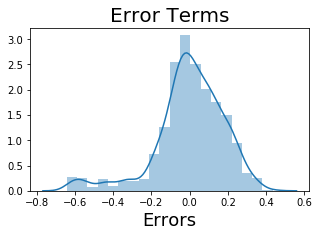

In [773]:
plt.figure(figsize=(5,3))
sns.distplot((y_train - y_train_grade),bins=20);
plt.title('Error Terms', fontsize = 20);               # Plot heading 
plt.xlabel('Errors', fontsize = 18)  ;

### It seems that the errors are normally distributed but we don't know about the model, until and unless we get the R Square value of Train and test set!

Let's calculate those:


In [774]:
print('Train R2 Score: ' , model_again.rsquared)
print('Adjusted R Squares: ',model_again.rsquared_adj)

Train R2 Score:  0.18340211887770896
Adjusted R Squares:  0.17776263074841137


In [775]:
testing_set[num_vars_to_scale] = scaler.transform(testing_set[num_vars_to_scale])
y_test = testing_set['G3']
X_test = testing_set

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [776]:
cols_for_test = X.columns
cols_for_test

Index(['school', 'failures', 'paid', 'higher', 'health'], dtype='object')

In [777]:
# Let's test our model for Test set:

X_test_new = X_test[cols_for_test] # taking the columns we get from our model
X_test_new = sm.add_constant(X_test_new) # making the model

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [778]:
y_pred = model_again.predict(X_test_new)

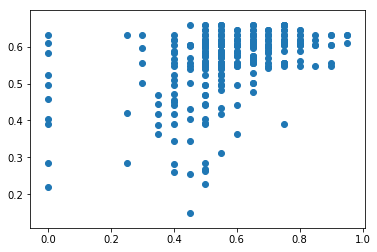

In [779]:
plt.scatter(y_test,y_pred);

In [781]:
from sklearn.metrics import r2_score
test_score=r2_score(y_test,y_pred)
r2_score(y_test, y_pred)

0.17889977967298787

In [782]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error is: ',rms)
rsquare_adjusted_score = model_again.rsquared_adj

Root Mean Squared Error is:  0.1528526569691973


In [783]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Train Score: ': rsquare_adjusted_score,'Test Score: ':test_score})
df.head(15)

,Actual,Predicted,Train Score:,Test Score:
247,0.40,0.259290,0.177763,0.1789
1014,0.65,0.574900,0.177763,0.1789
766,0.50,0.603703,0.177763,0.1789
892,0.50,0.394157,0.177763,0.1789
97,0.50,0.556423,0.177763,0.1789
408,0.65,0.630670,0.177763,0.1789
511,0.80,0.644154,0.177763,0.1789
994,0.70,0.554587,0.177763,0.1789
85,0.40,0.343432,0.177763,0.1789
1000,0.00,0.403028,0.177763,0.1789


## So we see that we definitely are not dealing with the *OVERFITTING* or *UNDERFITTING* issue. It is just that the data is not suitable for Linear regression Model!

# Inferences:

1. Since we donot have a lot of Dependent variables on **G3** which is our predictor variables, we are getting low scores for R2 on train and test set.
2. **Overfitting** : Batsmen plays well on the training pitch but fails to play with the same on the ground/stadium pitch.
    **Underfitting** : Batsmen doesn't play very well on the training pitch and may comparitevely play better @ Stadium, but not       enough to get conviced.
3. It maybe possible that our model is bit of Underfitted but since the problem statement asks us to make predictions without G1    and G2, hence the scores are valid almost.
4. The process/approach taken is a suitable one, but always remember that **building a Regression Model is more tougher than a Classification Model!**

# Thank You!